## 1. Importing Libraries

In [48]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np

# visualisasi distribusi untuk fitur kategorikal menggunakan bar chart
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.plot import plot_missing_value

# Data Resampling
from sklearn.utils import resample

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Ensembling
# from mlxtend.classifier import StackingCVClassifier

import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

## 2. Import Dataset

In [49]:
# Reading and converting the data into a pandas dataframe
df = pd.read_excel("C:/Users/ASUS/JupyterNotebook/Machine Learning/Coronary-Heart-Disease-Prediction-master/CardiacPrediction.xlsx") 

# Calculating the dimensions of the dataset
df.head() 

,SEQN,Gender,Age,Annual_Family_Income,Ratio_Family_Income_Poverty,X60_sec_pulse,Systolic,Diastolic,Weight,Height,...,Total_Cholesterol,HDL,Glycohemoglobin,Vigorous_work,Moderate_work,Health_Insurance,Diabetes,Blood_Rel_Diabetes,Blood_Rel_Stroke,CoronaryHeartDisease
0,2,1,77,8,5.00,68,98,56,75.4,174.0,...,5.56,1.39,4.7,3,3,1,2,2,2,0
1,5,1,49,11,5.00,66,122,83,92.5,178.3,...,7.21,1.08,5.5,1,1,1,2,2,2,0
2,12,1,37,11,4.93,64,174,99,99.2,180.0,...,4.03,0.98,5.2,2,1,1,2,1,1,0
3,13,1,70,3,1.07,102,130,66,63.6,157.7,...,8.12,1.28,7.6,3,3,1,1,1,2,0
4,14,1,81,5,2.67,72,136,61,75.5,166.2,...,4.50,1.04,5.8,1,1,1,2,2,2,0


## 3. Exploratory Data Analysis

In [50]:
# df = df.drop(columns=['SEQN', 'Annual_Family_Income', 'Ratio_Family_Income_Poverty', 'Height', 'Lymphocyte', 'Monocyte', 'Eosinophils', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.', 'Segmented-Neutrophils', 'Hematocrit', 'Total-Cholesterol', 'Health-Insurance', 'Vigorous-work', 'Moderate-work', 'Diabetes', 'Blood-Rel-Diabetes', 'Blood-Rel-Stroke'])

In [51]:
df.dtypes

SEQN                             int64
Gender                           int64
Age                              int64
Annual_Family_Income             int64
Ratio_Family_Income_Poverty    float64
X60_sec_pulse                    int64
Systolic                         int64
Diastolic                        int64
Weight                         float64
Height                         float64
Body_Mass_Index                float64
White_Blood_Cells              float64
Lymphocyte                     float64
Monocyte                       float64
Eosinophils                    float64
Basophils                      float64
Red_Blood_Cells                float64
Hemoglobin                     float64
Mean_Cell_Vol                  float64
Mean_Cell_Hgb_Conc.            float64
Mean_cell_Hemoglobin           float64
Platelet_count                 float64
Mean_Platelet_Vol              float64
Segmented_Neutrophils          float64
Hematocrit                     float64
Red_Cell_Distribution_Wid

In [52]:
# kondisi target yang dimiliki
df.CoronaryHeartDisease.value_counts()

0    35571
1     1508
Name: CoronaryHeartDisease, dtype: int64

In [53]:
df['Age'].max()

85

### Hubungan fitur-fitur numerical dengan target

37079


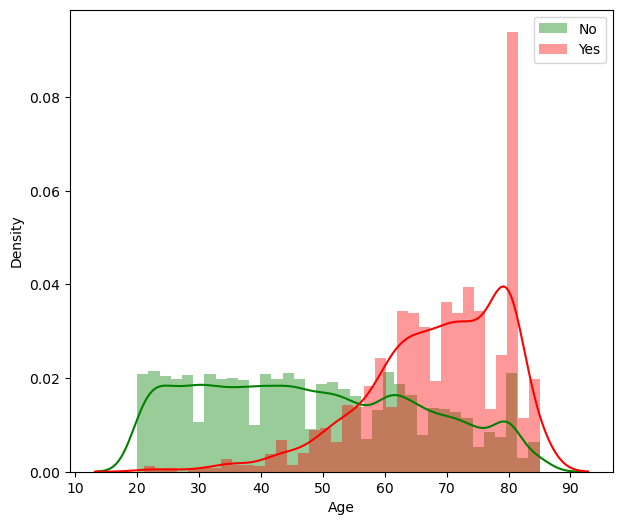

In [54]:
n = len(df['Age'])
print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Age'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Age'].max() - df['Age'].min()) / bin_width_fd)


plt.figure(figsize=(7, 6))
sns.distplot(df.Age[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Age[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

# # Mengelompokkan data berdasarkan 'Age' dan menghitung jumlah penderita penyakit jantung
# age_distribution = df.groupby('Age')['CoronaryHeartDisease'].value_counts().unstack()

# # Jumlah penderita penyakit jantung per kelompok umur
# heart_disease_counts = age_distribution[1]  # 1 mungkin mewakili 'Yes' untuk penyakit jantung

# # Menemukan kelompok umur dengan jumlah kasus penyakit jantung terbanyak
# max_disease_age = heart_disease_counts.idxmax()
# max_disease_count = heart_disease_counts.max()

# # Tampilkan umur dan jumlahnya
# max_disease_age, max_disease_count

37079


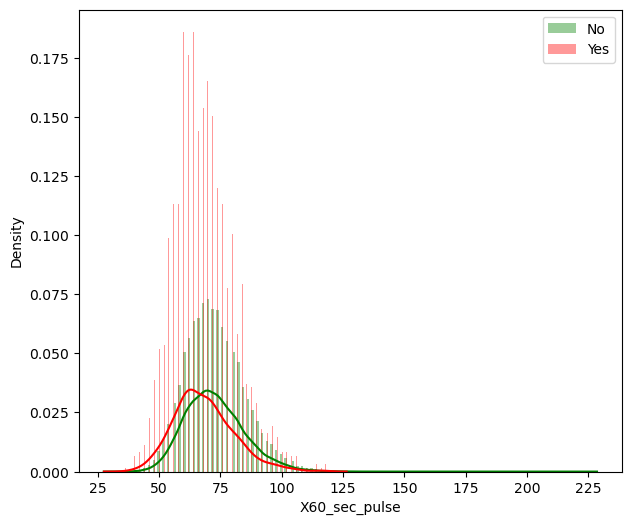

In [55]:
n = len(df['X60_sec_pulse'])
print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['X60_sec_pulse'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['X60_sec_pulse'].max() - df['X60_sec_pulse'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.X60_sec_pulse[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.X60_sec_pulse[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

37079
There are 11028 people with a systolic blood pressure above 130.


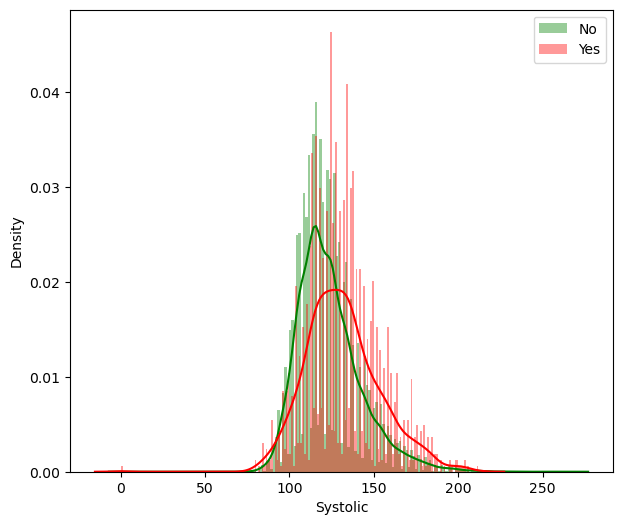

In [56]:
n = len(df['Systolic'])
print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Systolic'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Systolic'].max() - df['Systolic'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Systolic[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Systolic[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

# Count the number of people with systolic blood pressure greater than 130
high_systolic_count = df[df['Systolic'] > 130].shape[0]

print(f"There are {high_systolic_count} people with a systolic blood pressure above 130.")


37079
There are 3764 people with a diastolic blood pressure above 85.


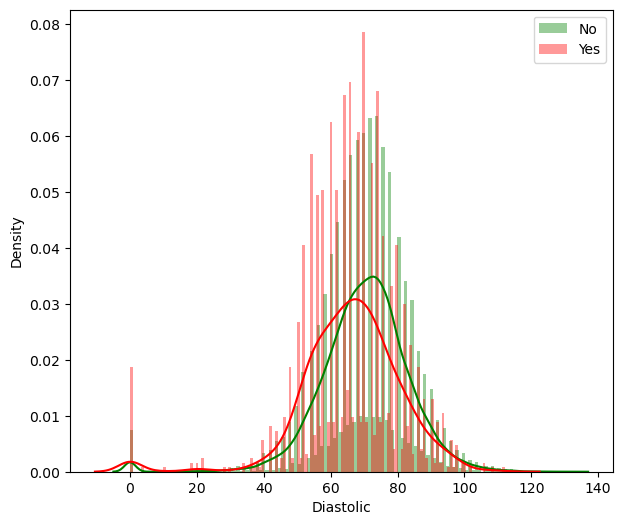

In [57]:
n = len(df['Diastolic'])
print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Diastolic'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Diastolic'].max() - df['Diastolic'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Diastolic[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Diastolic[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

# Count the number of people with systolic blood pressure greater than 130
high_diastolic_count = df[df['Diastolic'] > 85].shape[0]

print(f"There are {high_diastolic_count} people with a diastolic blood pressure above 85.")


37079


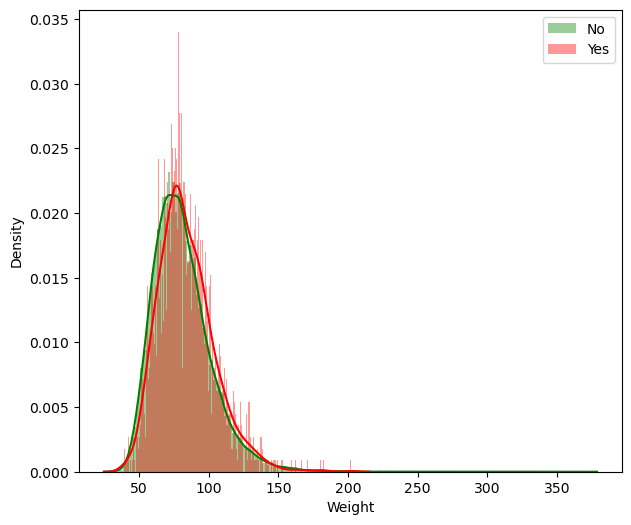

In [58]:
n = len(df['Weight'])
print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Weight'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Weight'].max() - df['Weight'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Weight[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Weight[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

37079


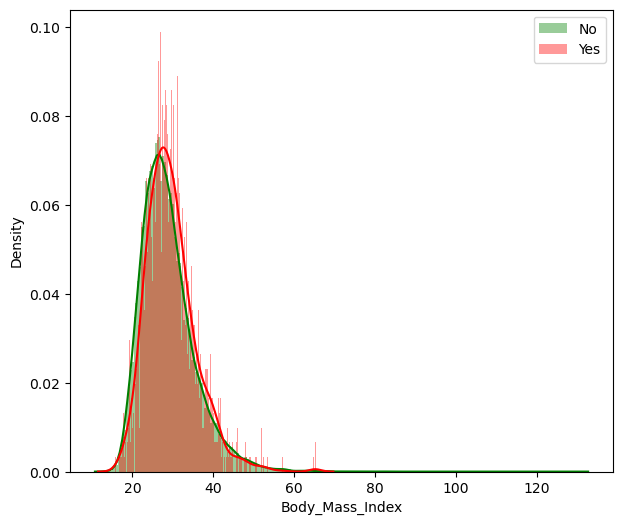

In [59]:
n = len(df['Body_Mass_Index'])
print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Body_Mass_Index'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Body_Mass_Index'].max() - df['Body_Mass_Index'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Body_Mass_Index[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Body_Mass_Index[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

37079


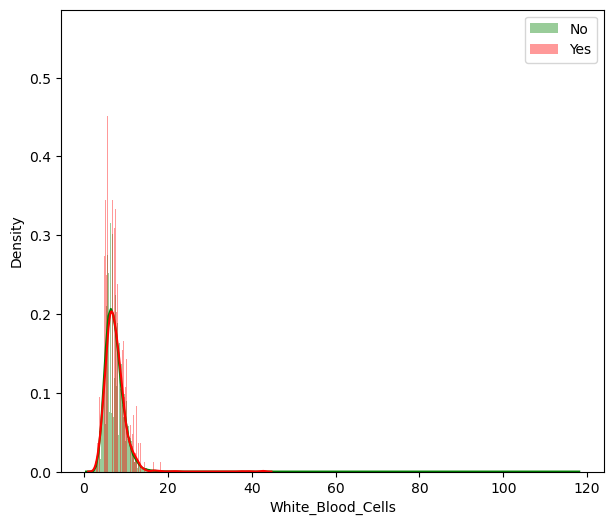

In [60]:
n = len(df['White_Blood_Cells'])
print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['White_Blood_Cells'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['White_Blood_Cells'].max() - df['White_Blood_Cells'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.White_Blood_Cells[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.White_Blood_Cells[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

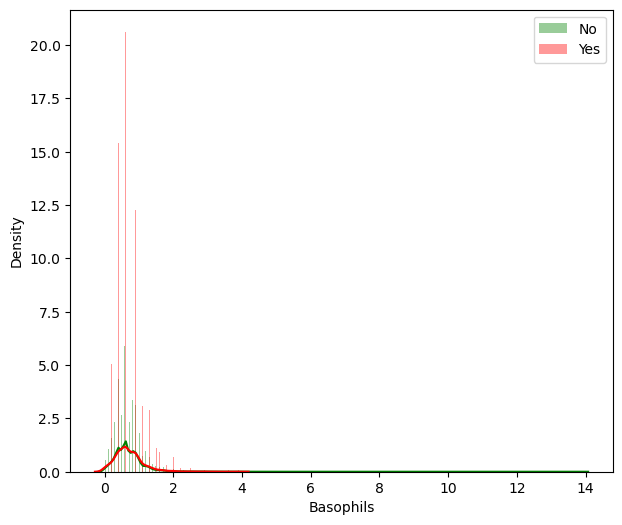

In [61]:
n = len(df['Basophils'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Basophils'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Basophils'].max() - df['Basophils'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Basophils[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Basophils[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

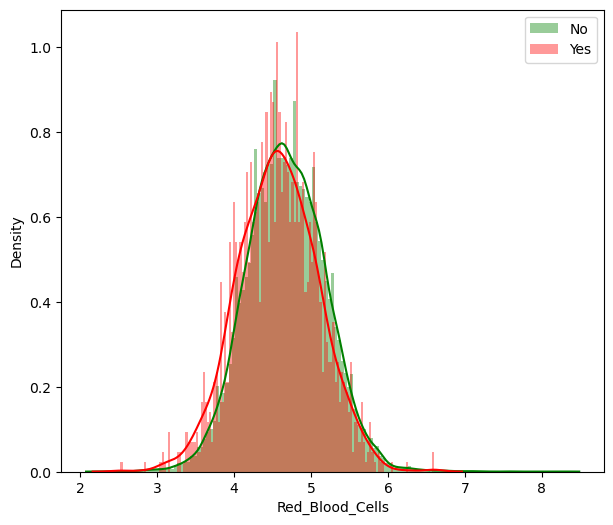

In [62]:
n = len(df['Red_Blood_Cells'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Red_Blood_Cells'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Red_Blood_Cells'].max() - df['Red_Blood_Cells'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Red_Blood_Cells[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Red_Blood_Cells[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

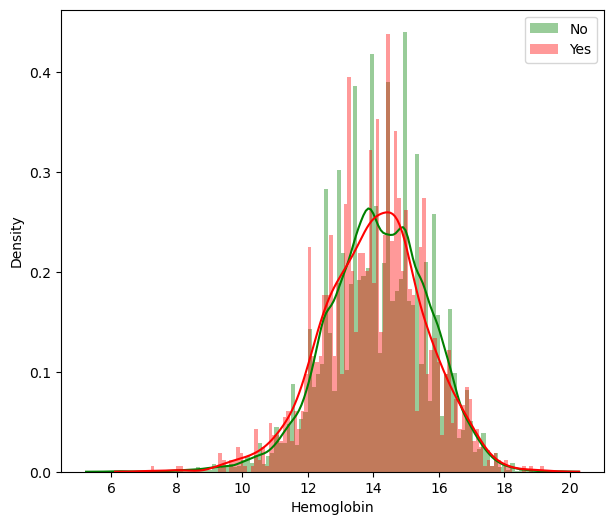

In [63]:
n = len(df['Hemoglobin'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Hemoglobin'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Hemoglobin'].max() - df['Hemoglobin'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Hemoglobin[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Hemoglobin[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

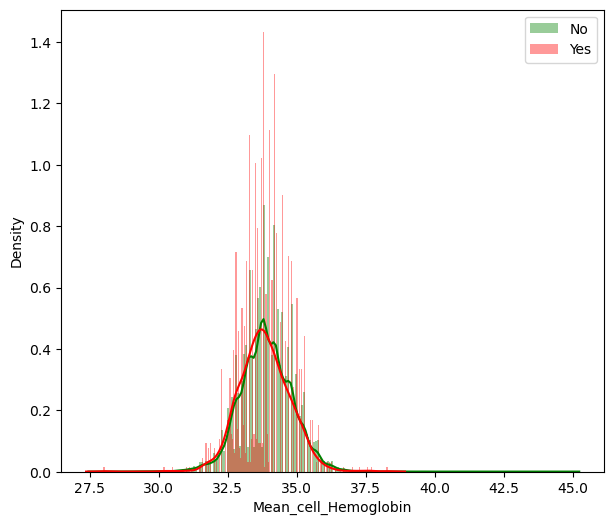

In [64]:
n = len(df['Mean_cell_Hemoglobin'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Mean_cell_Hemoglobin'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Mean_cell_Hemoglobin'].max() - df['Mean_cell_Hemoglobin'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Mean_cell_Hemoglobin[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Mean_cell_Hemoglobin[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

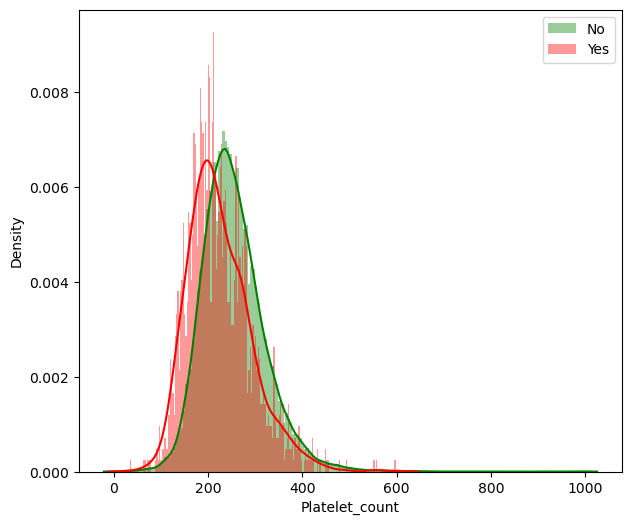

In [65]:
n = len(df['Platelet_count'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Platelet_count'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Platelet_count'].max() - df['Platelet_count'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Platelet_count[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Platelet_count[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

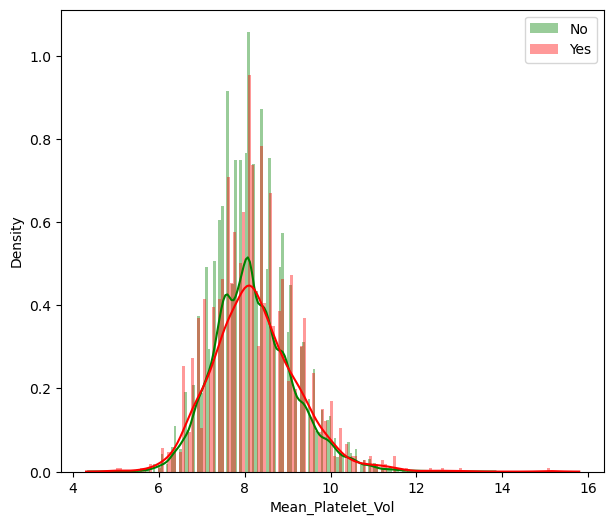

In [66]:
n = len(df['Mean_Platelet_Vol'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Mean_Platelet_Vol'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Mean_Platelet_Vol'].max() - df['Mean_Platelet_Vol'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Mean_Platelet_Vol[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Mean_Platelet_Vol[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

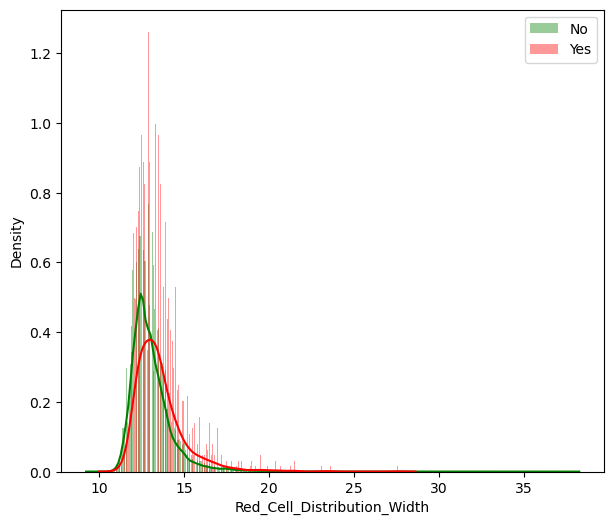

In [67]:
n = len(df['Red_Cell_Distribution_Width'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Red_Cell_Distribution_Width'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Red_Cell_Distribution_Width'].max() - df['Red_Cell_Distribution_Width'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Red_Cell_Distribution_Width[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Red_Cell_Distribution_Width[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

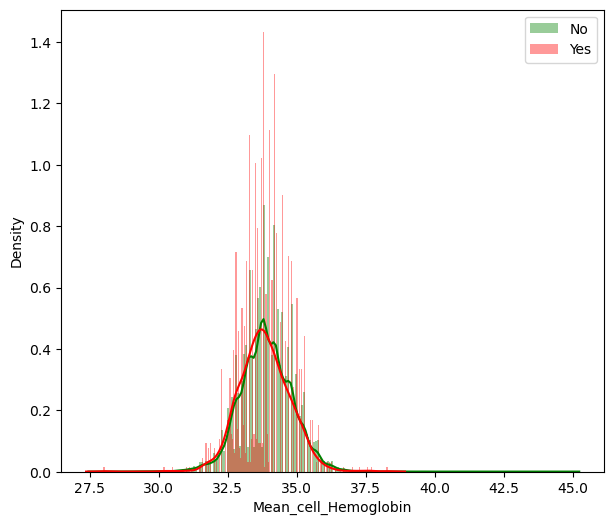

In [68]:
n = len(df['Mean_cell_Hemoglobin'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Mean_cell_Hemoglobin'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Mean_cell_Hemoglobin'].max() - df['Mean_cell_Hemoglobin'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Mean_cell_Hemoglobin[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Mean_cell_Hemoglobin[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

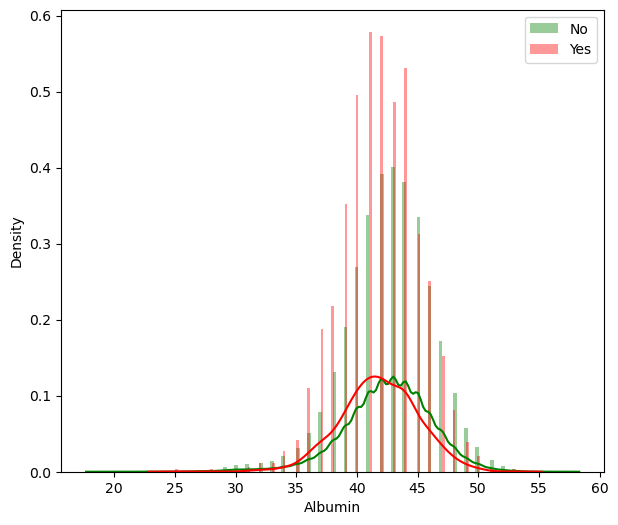

In [69]:
n = len(df['Albumin'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Albumin'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Albumin'].max() - df['Albumin'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Albumin[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Albumin[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

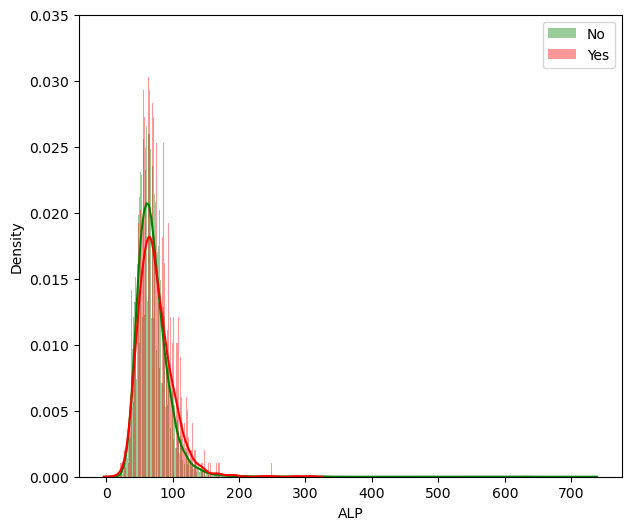

In [70]:
n = len(df['ALP'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['ALP'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['ALP'].max() - df['ALP'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.ALP[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.ALP[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

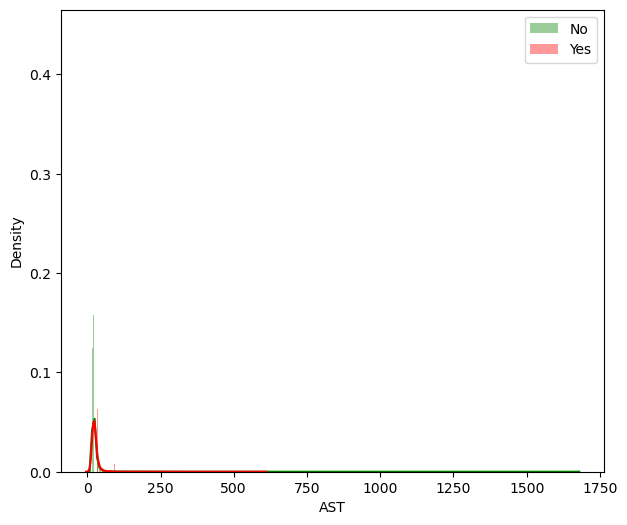

In [71]:
n = len(df['AST'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['AST'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['AST'].max() - df['AST'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.AST[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.AST[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

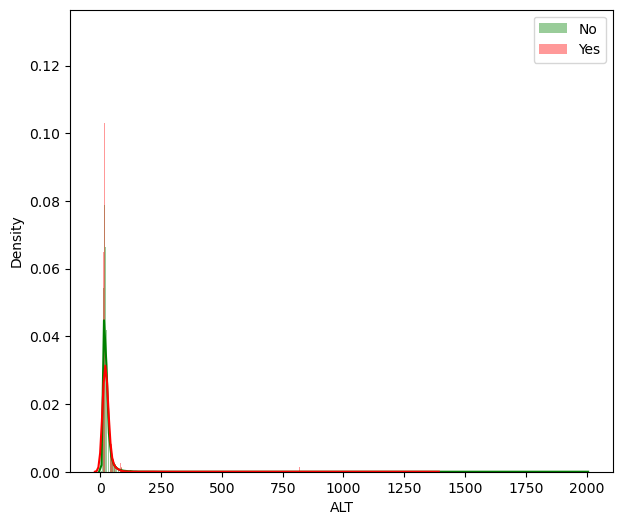

In [72]:
n = len(df['ALT'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['ALT'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['ALT'].max() - df['ALT'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.ALT[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.ALT[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

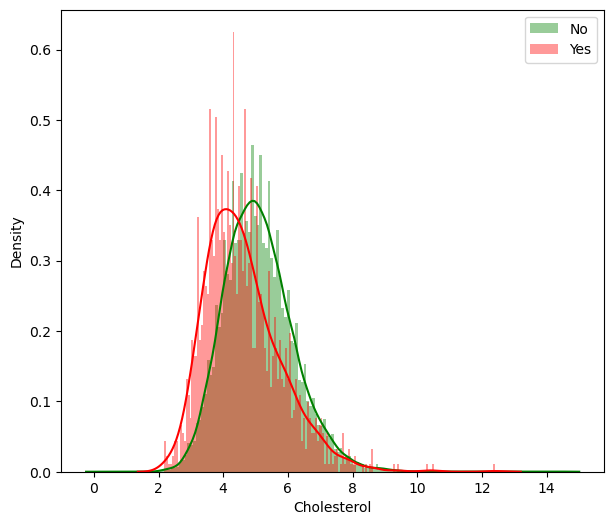

In [73]:
n = len(df['Cholesterol'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Cholesterol'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Cholesterol'].max() - df['Cholesterol'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Cholesterol[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Cholesterol[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

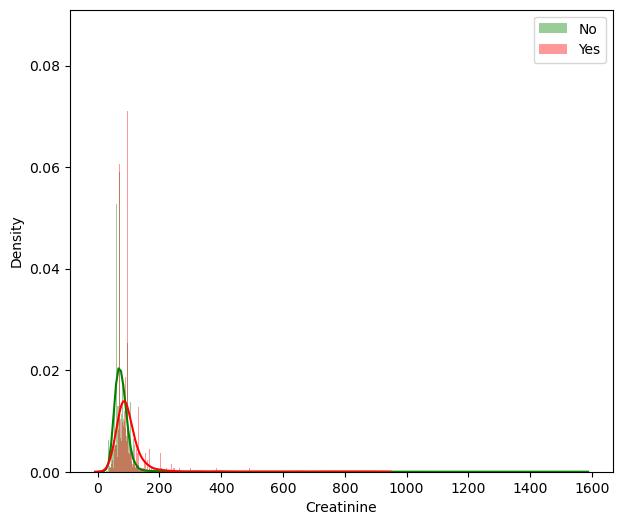

In [74]:
n = len(df['Creatinine'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Creatinine'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Creatinine'].max() - df['Creatinine'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Creatinine[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Creatinine[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

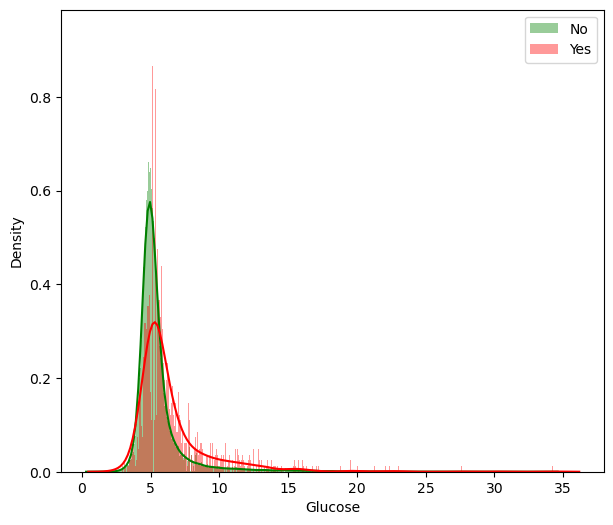

In [75]:
n = len(df['Glucose'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Glucose'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Glucose'].max() - df['Glucose'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Glucose[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Glucose[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

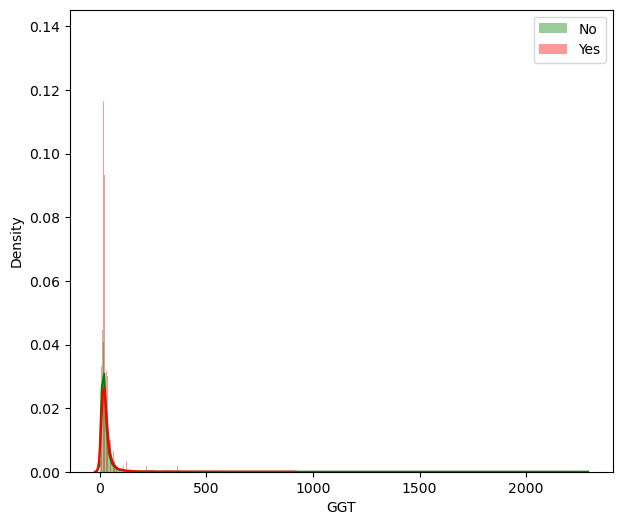

In [76]:
n = len(df['GGT'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['GGT'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['GGT'].max() - df['GGT'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.GGT[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.GGT[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

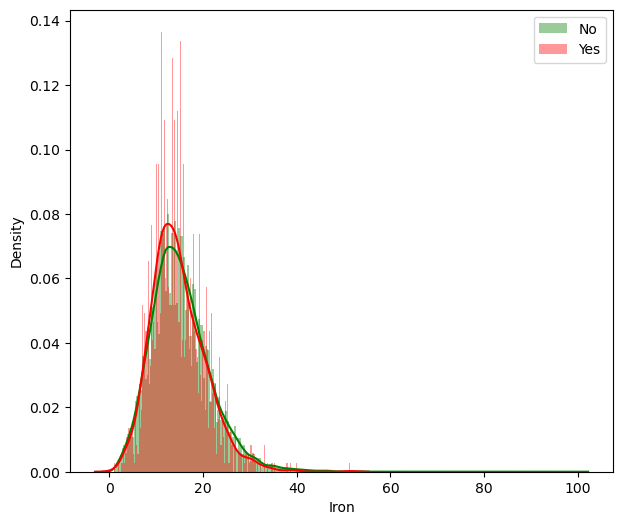

In [77]:
n = len(df['Iron'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Iron'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Iron'].max() - df['Iron'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Iron[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Iron[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

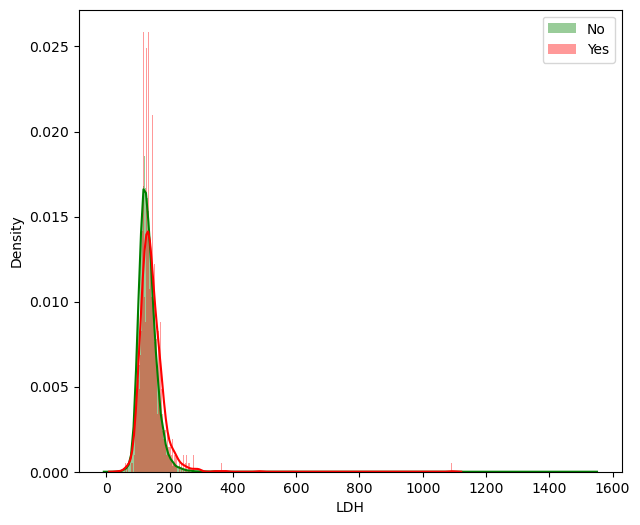

In [78]:
n = len(df['LDH'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['LDH'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['LDH'].max() - df['LDH'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.LDH[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.LDH[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

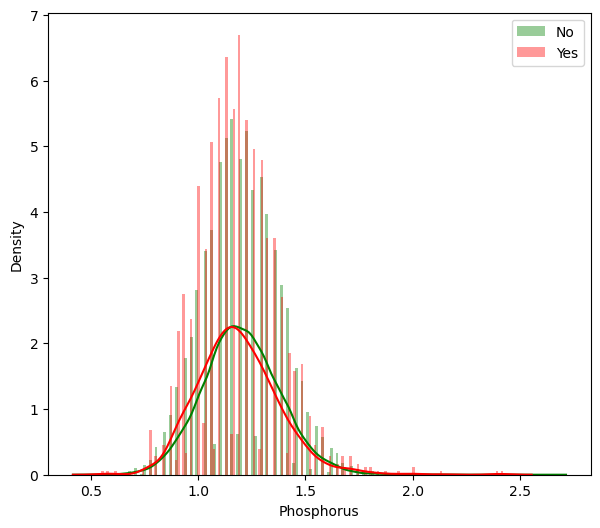

In [79]:
n = len(df['Phosphorus'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Phosphorus'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Phosphorus'].max() - df['Phosphorus'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Phosphorus[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Phosphorus[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

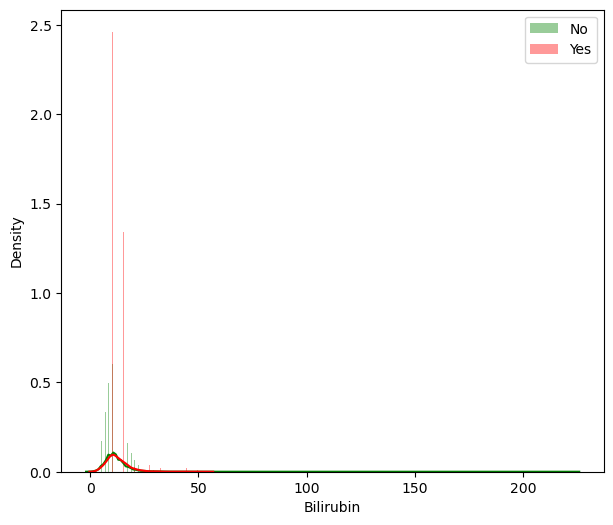

In [80]:
n = len(df['Bilirubin'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Bilirubin'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Bilirubin'].max() - df['Bilirubin'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Bilirubin[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Bilirubin[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

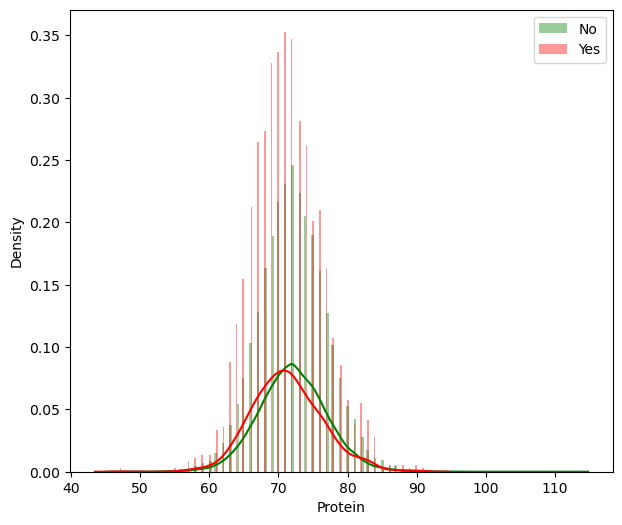

In [81]:
n = len(df['Protein'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Protein'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Protein'].max() - df['Protein'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Protein[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Protein[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

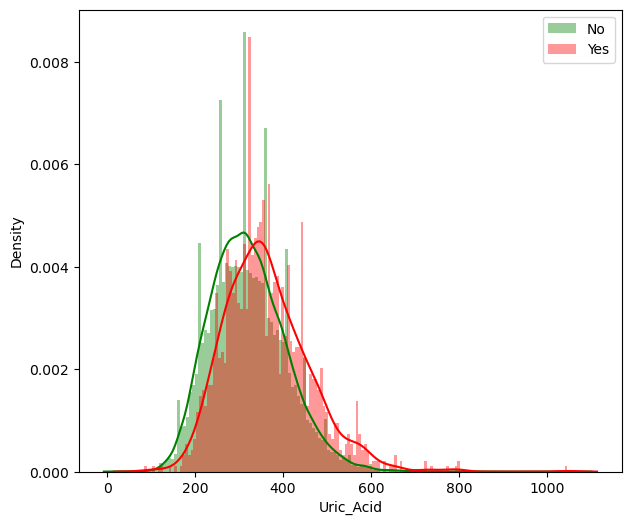

In [82]:
n = len(df['Uric_Acid'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Uric_Acid'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Uric_Acid'].max() - df['Uric_Acid'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Uric_Acid[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Uric_Acid[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

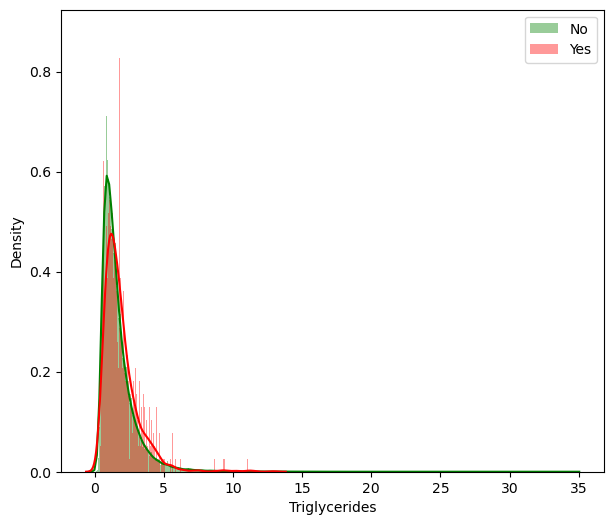

In [83]:
n = len(df['Triglycerides'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Triglycerides'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Triglycerides'].max() - df['Triglycerides'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Triglycerides[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Triglycerides[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

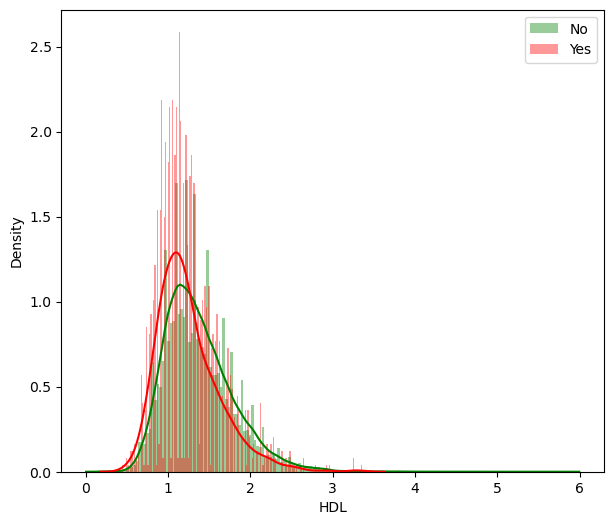

In [84]:
n = len(df['HDL'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['HDL'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['HDL'].max() - df['HDL'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.HDL[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.HDL[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

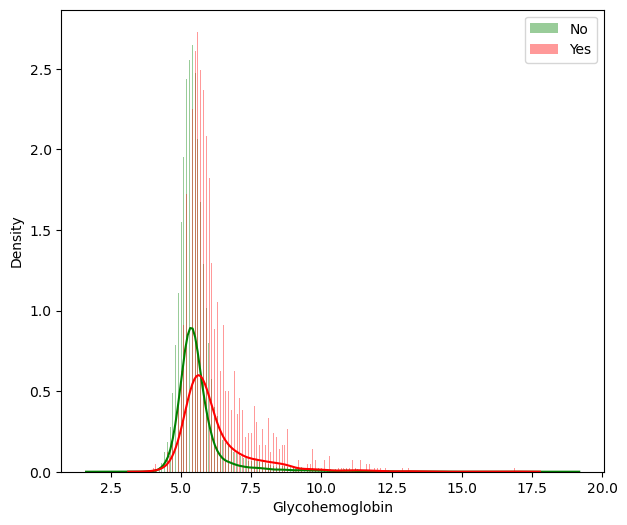

In [85]:
n = len(df['Glycohemoglobin'])
# print(n)
# Aturan Freedman-Diaconis
q75, q25 = np.percentile(df['Glycohemoglobin'], [75 ,25])
iqr = q75 - q25
bin_width_fd = 2 * iqr * n ** (-1/3)
bins_fd = int((df['Glycohemoglobin'].max() - df['Glycohemoglobin'].min()) / bin_width_fd)

plt.figure(figsize=(7, 6))
sns.distplot(df.Glycohemoglobin[df.CoronaryHeartDisease == 0], bins=bins_fd, color="g", label="No")
sns.distplot(df.Glycohemoglobin[df.CoronaryHeartDisease == 1], bins=bins_fd, color="r", label="Yes")
plt.legend()

In [86]:
#visualisasi distribusi untuk fitur numerikal menggunakan histogram.
numerical_features = ['Age', 'X60_sec_pulse','Systolic', 'Diastolic', 'Weight', 'Body_Mass_Index', 'White_Blood_Cells', 
                      'Basophils', 'Red_Blood_Cells', 'Hemoglobin', 'Mean_cell_Hemoglobin', 'Platelet_count',
                      'Mean_Platelet_Vol', 'Red_Cell_Distribution_Width', 'Albumin', 'ALP', 'AST', 'ALT', 
                      'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 
                      'Bilirubin', 'Protein', 'Uric.Acid', 'Triglycerides', 'HDL', 'Glycohemoglobin']

### Hubungan fitur-fitur kategorikal dengan target

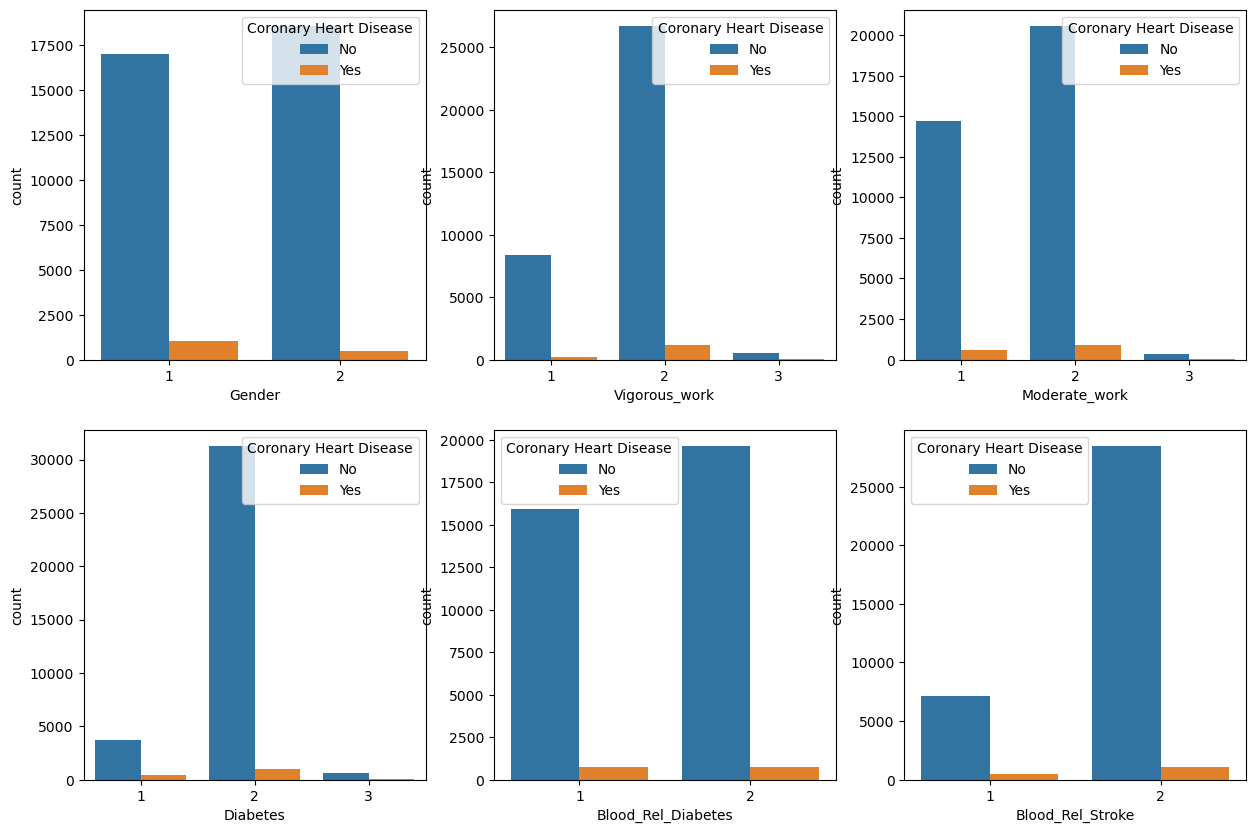

In [87]:
cat_var = ['Gender', 'Vigorous_work', 'Moderate_work', 'Diabetes', 'Blood_Rel_Diabetes', 'Blood_Rel_Stroke']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for categoric, ax in zip(cat_var, axes.flatten()):
    sns.countplot(categoric, data=df, hue="CoronaryHeartDisease", ax=ax)
    ax.legend(title='Coronary Heart Disease', labels=['No', 'Yes'])

## 4. Pre-Processing

In [ ]:
df.describe()

## Feature Splitting

In [ ]:
X = df.drop(['CoronaryHeartDisease'], axis=1) #x atribut yang mempengaruhi CoronaryHeartDisease (independent variable)
y = df['CoronaryHeartDisease'] #y atribut label (dependent)

In [ ]:
df['CoronaryHeartDisease'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, 
                                                    stratify = y, #memastikan bahwa split antara train dan test memiliki proporsi kelas yang sama dengan set data asli.
                                                    random_state = 42)

In [ ]:
df['CoronaryHeartDisease'].value_counts()

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)
print(y_test.shape)


In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
X_train.describe()

## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

## Predictive Modeling

1. Random Forest Classifier
2. Gradient Boosting Classifier

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
m1 = 'Random Forest Classfier'
rf = RandomForestClassifier(max_depth=12, n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

In [ ]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

In [ ]:
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

In [ ]:
m2 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(X_train,y_train)

In [ ]:
gvc.score(X_train, y_train), gvc.score(X_test, y_test)

In [ ]:
gvc_predicted = gvc.predict(X_test)
gvc_conf_matrix = confusion_matrix(y_test, gvc_predicted)
gvc_acc_score = accuracy_score(y_test, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(y_test,gvc_predicted))

In [ ]:
y_predict = []

for element in gvc_predicted:
    if element > 0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)

In [ ]:
print("10 Nilai Prediksi", y_predict[:800])
print("10 Nilai Aktual", y_test[:800])

adalah nilai prediksi dan nilai aktual dari 800 nilai prediksi pertama (0 - 800)

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(y_test[:800].values, label="Aktual", marker="o")
plt.plot(y_predict[:800], label="Prediksi")
plt.title("Churn Prediction Imbalanced Class")
plt.ylabel("Close")
plt.xlabel("Date")
plt.legend()

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
result = cross_val_score(rf, X, y, scoring="roc_auc", cv=cv, n_jobs=-1)
print("Mean AUC: %.3f" % np.mean(result))

## Resampling imbalanced dataset by oversampling positive cases Using SMOTE

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
print(X.shape)
print(y.shape)
print(y.value_counts())

smote = SMOTE(sampling_strategy = 'minority', random_state=100)
X_sm, y_sm = smote.fit_resample(X, y)
print(X_sm.shape)
print(y_sm.shape)
print(y_sm.value_counts())

In [ ]:
from collections import Counter

labels = Counter(y_sm)
print("y labels after oversampling")
print(labels)

In [ ]:
colors = ['#3274A1', '#E1812C']
pd.Series(y_sm).value_counts().plot(kind='bar', 
                                    title='Distribusi Class CoronaryHeartDisease setelah diterapkan SMOTE', 
                                    xlabel='CoronaryHeartDisease',
                                    color=colors)
plt.xticks(rotation=360)

In [ ]:
# Combine the resampled minority class with the majority class
resampled_data = pd.concat([X_sm, y_sm], axis=1)

are_rows_equal = resampled_data.duplicated().any()

if are_rows_equal:
    print("Ada baris yang sama di antara kedua dataframe.")
else:
    print("Tidak ada baris yang sama di antara kedua dataframe.")

# Mengecek duplikasi setelah resampling
print("Jumlah baris duplikat setelah resampling:", resampled_data.duplicated().sum())

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
result = cross_val_score(rf, X_sm, y_sm, scoring="roc_auc", cv=cv, n_jobs=-1)
print("Mean AUC: %.3f" % np.mean(result))

In [ ]:
predict_y = []

for element in rf_predicted:
    if element > 0.5:
        predict_y.append(1)
    else:
        predict_y.append(0)
predict_y = []

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(y_test[:800].values, label="Aktual", marker="o")
plt.plot(y_predict[:800], label="Prediksi")
plt.title("Churn Prediction Imbalanced Class")
plt.ylabel("Close")
plt.xlabel("Date")
plt.legend()

In [ ]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, 
                                                    test_size = 0.4, 
                                                    random_state = 42)


In [ ]:
print(X_train_sm.shape)
print(X_test_sm.shape)
print(y_train_sm.shape)
print(y_test_sm.shape)

In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(X_train_sm,y_train_sm)
rf_predicted = rf.predict(X_test_sm)
rf_conf_matrix = confusion_matrix(y_test_sm, rf_predicted)
rf_acc_score = accuracy_score(y_test_sm, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test_sm,rf_predicted))

In [ ]:
m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(X_train_sm,y_train_sm)
gvc_predicted = gvc.predict(X_test_sm)
gvc_conf_matrix = confusion_matrix(y_test_sm, gvc_predicted)
gvc_acc_score = accuracy_score(y_test_sm, gvc_predicted)
print("confussion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(y_test_sm,gvc_predicted))

## Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from imblearn.pipeline import Pipeline

# Membuat pipeline yang menggabungkan SMOTE dengan model
pipeline = Pipeline(steps=[('over', smote), ('model', rf)])

# Mendefinisikan StratifiedKFold untuk validasi silang
cv = StratifiedKFold(n_splits=5)

# Mendefinisikan skor untuk evaluasi
scorer = make_scorer(accuracy_score)

# Melakukan validasi silang dan menghitung skor akurasi
scores = cross_val_score(pipeline, X, y, scoring=scorer, cv=cv)

print(f'Skor Akurasi untuk setiap fold: {scores}')
print(f'Rata-rata Skor Akurasi: {scores.mean()}')


## Menghitung korelasi

In [ ]:
#Checking relationship between variables
cor=df.corr()
plt.figure(figsize=(40,30), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

In [ ]:
# # Deskripsi statistik dasar untuk fitur kategorikal
# print(dataframe.describe())

# # Menghitung jumlah nilai unik untuk setiap fitur kategorikal
# for col in ['Gender', 'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes', 'Blood-Rel-Diabetes', 'Blood-Rel-Stroke']:
#     print(f"Jumlah nilai unik di {col}: {dataframe[col].nunique()}")
#     print(dataframe[col].value_counts())
#     print("-----------------")


### a. Univariate Analysis

#### Categorical Features

categorical_features = ['Gender', 'Vigorous-work', 'Moderate-work', 'Diabetes', 'Blood-Rel-Diabetes', 'Blood-Rel-Stroke']

for feature in categorical_features:
    print(feature,':')
    print(dataframe[feature].value_counts())
    print("-----------------")

categorical_features = ['Gender', 'Vigorous-work', 'Moderate-work', 'Diabetes', 'Blood-Rel-Diabetes', 'Blood-Rel-Stroke']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=dataframe)
    plt.title(f'Distribusi {feature}')
    plt.show()

Diantara fitur kategorikal : 
* `Vigorous-work`, `diabetes`, `Blood-Rel-Stroke` sangat tidak seimbang.
* `Moderate-work` untuk kategori 2 memiliki jumlah tertinggi, yang menunjukkan bahwa mayoritas responden tidak melakukan pekerjaan sedang dan dan kategori 3 (kategori Tidak dapat melakukan aktivitas) memiliki jumlah yang sangat sedikit.
* Distribusi `Gender` menunjukkan distribusi yang hampir seimbang antara jenis kelamin dalam sampel.

#### Numerical Features

visualisasi distribusi untuk fitur numerikal menggunakan histogram.

numerical_features = ['Age', 'X60-sec-pulse','Systolic', 'Diastolic', 'Weight', 'Body-Mass-Index', 'White-Blood-Cells', 
                      'Basophils', 'Red-Blood-Cells', 'Hemoglobin', 'Mean-cell-Hemoglobin', 'Platelet-count',
                      'Mean-Platelet-Vol', 'Red-Cell-Distribution-Width', 'Albumin', 'ALP', 'AST', 'ALT', 
                      'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH', 'Phosphorus', 
                      'Bilirubin', 'Protein', 'Uric.Acid', 'Triglycerides', 'HDL', 'Glycohemoglobin',
                      'Diabetes', 'Blood-Rel-Diabetes', 'Blood-Rel-Stroke']

tipe data numerik standar untuk bilangan pecahan dan bilangan bulat.
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

Menghapus fitur kategorikal yang mungkin secara tidak sengaja dianggap sebagai numerik
numerical_features = [feature for feature in numerical_features if feature not in numerical_features]

for feature in numerical_features:
    plt.figure(figsize=(6, 3))
    sns.histplot(dataframe[feature], kde=True)
    plt.title(f'Distribusi {feature}')
    plt.show()


# Feature Selection


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Membaca dataset
# df = pd.read_excel('/mnt/data/CardiacPrediction.xlsx')

# Mengasumsikan 'target' adalah kolom target Anda
# X = df.drop('target', axis=1)  # Mengganti 'target' dengan nama kolom target sebenarnya
# y = df['target']

# Meng-encode target kategorikal menjadi numerik
# encoder = LabelEncoder()
# y_encoded = encoder.fit_transform(y)

# Menggunakan Mutual Information
selector = SelectKBest(score_func=mutual_info_classif, k='all')  # 'k' adalah jumlah fitur teratas yang akan dipilih
selector.fit(X_sm, y_sm)

# Mendapatkan skor untuk setiap fitur
scores = selector.scores_

# Mencetak skor
for feature, score in zip(X.columns, scores):
    print(f"{feature}: {score}")

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Contoh kode untuk diskretisasi fitur numerik (binning) dan aplikasi Chi-Square
# Anggap df adalah DataFrame Anda

# Meng-encode target kategorikal menjadi numerik
# y = df['target']  # ganti 'target' dengan nama kolom target yang sesuai
# encoder = LabelEncoder()
# y_encoded = encoder.fit_transform(y)

# Contoh diskretisasi fitur numerik (anda harus mengadaptasinya sesuai kebutuhan Anda)
# X_binned = pd.cut(df['fitur_numerik'], bins=3, labels=False)  # Lakukan ini untuk setiap fitur numerik

# Aplikasi Chi-Square setelah diskretisasi
selector = SelectKBest(score_func=chi2, k='all')  # 'k' adalah jumlah fitur teratas yang akan dipilih
selector.fit(X_sm, y_sm)

# Mendapatkan skor untuk setiap fitur
scores = selector.scores_

# Visualisasi skor Chi-Square
plt.figure(figsize=(10, 8))
plt.barh(np.arange(len(X_sm.columns)), scores, align='center')
plt.yticks(np.arange(len(X_sm.columns)), X_sm.columns)
plt.xlabel('Skor Chi-Square')
plt.title('Skor Chi-Square untuk Setiap Fitur')

plt.show() 

In [ ]:
#To idenfify the features that have larger contribution towards the outcome variable, CoronaryHeartDisease
X=resampled_data.iloc[:,0:31]
y=resampled_data.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)
print(X)

In [ ]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=20)

In [ ]:
fit=best.fit(X,y)

In [ ]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [ ]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(31,'Score'))

In [ ]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Score',y='Feature',data=scores,palette='BuGn_r')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

This plot shows the `Features` and their respective `chi-square test` scores

In [ ]:
#Select 10 features
features=scores["Feature"].tolist()[:20]
features

In [ ]:
data=df[['Age', 'Uric.Acid', 'Cholesterol', 'Platelet-count', 'Glucose', 'Creatinine', 'Glycohemoglobin', 'X60-sec-pulse', 
         'HDL', 'Diastolic', 'Systolic', 'Red-Cell-Distribution-Width', 'Red-Blood-Cells', 'Weight', 'Triglycerides', 
         'Protein', 'LDH', 'Albumin', 'Phosphorus', 'Iron']]
data.head()

## Hyperparameter Tuning for best Classifier
#### Using Randomized Search Cross Validation

### Random Forest Classifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 10, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_sm, y_train_sm)

In [ ]:
rf_hyper = rf_random.best_estimator_
rf_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(rf_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(rf_hyper.score(test_x, test_y)))
rf_predicted = rf_hyper.predict(test_x)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("Accuracy of Hyper-tuned Random Forest Classifier:",rf_acc_score*100,'\n')
print(classification_report(test_y, rf_predicted))

### Gradient Boosting Classifier

In [ ]:
#Number of trees
n_estimators = [int(i) for i in np.linspace(start=100,stop=1000,num=10)]
#Number of features to consider at every split
max_features = ['auto','sqrt']
#Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(10, 100, num=10)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split=[2,5,10]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
gb=GradientBoostingClassifier(random_state=0)
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=random_grid,
                              n_iter=10, scoring='f1', 
                              cv=3, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
gb_random.fit(train_x,train_y)

In [ ]:
gb_hyper = gb_random.best_estimator_
gb_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(gb_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(gb_hyper.score(test_x, test_y)))
gbc_predicted = gb_hyper.predict(test_x)
gbc_acc_score = accuracy_score(test_y, gbc_predicted)
print("Accuracy of Hyper-tuned Gradient Boosting Classifier:",gbc_acc_score*100,'\n')
print(classification_report(test_y, gbc_predicted))

In [ ]:
#Number of neighbors
n_neighbors = np.arange(1, 10)
#Number of weights
weights = ['uniform','distance']
#metric
metric = ['euclidean', 'manhattan', 'minkowski']

#Create the random grid
random_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Berbagai nilai untuk n_neighbors
    'weights': ['uniform', 'distance'],  # Pilihan untuk jenis bobot
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Pilihan untuk algoritma
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Pilihan metrik jarak
#     'p': [1, 2],  # Nilai p untuk metrik Minkowski
}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
knn = KNeighborsClassifier()

# Inisialisasi RandomizedSearchCV
knn_random = RandomizedSearchCV(estimator=knn, param_distributions=random_grid,
                                   n_iter=100,  # Jumlah kombinasi yang akan diuji
                                   scoring='f1',  # Metrik evaluasi yang digunakan
                                   cv=3,  # Jumlah lipatan validasi silang (cross-validation)
                                   verbose=2,  # Tingkat verbosity
                                   n_jobs=-1,  # Menggunakan semua CPU yang tersedia
                                   random_state=0,  # Seed untuk reproduksi
                                   return_train_score=True)

# Melatih model dengan pencarian acak
knn_random.fit(train_x, train_y)

In [ ]:
knn_hyper = knn_random.best_estimator_
knn_hyper.fit(train_x,train_y)
print("Accuracy on training set is : {}".format(knn_hyper.score(train_x,train_y)))
print("Accuracy on validation set is : {}".format(knn_hyper.score(test_x, test_y)))
knnc_predicted = knn_hyper.predict(test_x)
knnc_acc_score = accuracy_score(test_y, knnc_predicted)
print("Accuracy of Hyper-tuned K Nearest Neighbor:",knn_acc_score*100,'\n')
print(classification_report(test_y, knnc_predicted))

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(test_y,lr_predict)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(test_y,knn_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(test_y,rf_predicted)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(test_y,dt_predicted)
gbc_false_positive_rate,gbc_true_positive_rate,gbc_threshold = roc_curve(test_y,gbc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(15,8), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(gbc_false_positive_rate,gbc_true_positive_rate,label='Gradient Boosting Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# **Model Evaluation**

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Random Forest',
                                   'Decision Tree','Gradient Boosting'], 'Accuracy': [lr_acc_score*100, knn_acc_score*100, 
                                                                                      rf_acc_score*100, dt_acc_score*100,gbc_acc_score*100]})
model_ev

In [ ]:
colors = ['red','green','blue','gold','silver']
plt.figure(figsize=(15,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# Ensembling

In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.

In [ ]:
scv=StackingCVClassifier(classifiers=[rf_hyper, gb_hyper, knn], meta_classifier= rf)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)
scv.fit(train_x.values,train_y.values)
scv_predicted = scv.predict(test_x)
scv_conf_matrix = confusion_matrix(test_y, scv_predicted)
scv_acc_score = accuracy_score(test_y, scv_predicted)
scv_rec_score = recall_score(test_y, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print("Recall of StackingCVClassifier:",scv_rec_score*100,'\n')

print(classification_report(test_y,scv_predicted))

In [ ]:
scv=StackingCVClassifier(classifiers=[rf_hyper, gb_hyper], meta_classifier= rf)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)
scv.fit(train_x.values,train_y.values)
scv_predicted = scv.predict(test_x)
scv_conf_matrix = confusion_matrix(test_y, scv_predicted)
scv_acc_score = accuracy_score(test_y, scv_predicted)
scv_rec_score = recall_score(test_y, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print("Recall of StackingCVClassifier:",scv_rec_score*100,'\n')

print(classification_report(test_y,scv_predicted))